YouTube video: [The spelled-out intro to language modeling: building makemore](https://www.youtube.com/watch?v=PaCmpygFfXo)

GitHub repository: [karpathy/makemore](https://github.com/karpathy/makemore).
> The data file **names.txt** can be found in it.

In [1]:
# Load data 

words = open('./data/names.txt', 'r').read().splitlines()

len(words)

32033

In [2]:
# Here it uses Python generator feature
# And applies the len() function to each element of the generator

min(len(w) for w in words)

2

In [3]:
max(len(w) for w in words)

15

In [5]:
import torch

In [7]:
# Feature:
#    Prepare the character lookups

chars = sorted(list(set(''.join(words))))

stoi = { s:i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27





# Feature

    Count the [2-consecutive characters] occurance in the word list

# Algorithm Explanation

```
    Loop through [word list]
       Convert [word] from string to [word character list]
       Add special start character '<S>' to the beginning of [word character list]
       Add special end   character '<E>' to the end       of [word character list]

       Iterate through a [word character list] with [2-consecutive characters].
       Use a tuple to describe the [2-consecutive characters].
       This tuple is used as key to count the occurence frequency of the [2-consecutive characters]
       A dictionary collects the key:value pairs as follow
           { 
               [2-consecutive characters]: occurence frequency,
           }
```


# Syntax Explanation

    1. list(string) 

 
       list function apply to a string, breaks the string into a list with constituting characters

    3. zip() function 

 
       stops iterating when the shortest iterable is exhausted.

# YouTube video time duration

    06:25 - 12:50

In [10]:
# Feature:
#    Keep the [2-consecutive characters] count information in an array
#    Instead of Python dictionary

# 28 by 28 array, 
# 26 characters + 2 special characters

N = torch.zeros((28,28), dtype=torch.int32)

In [11]:
for w in words:
    
    chs = ['<S>'] + list(w) + ['<E>']
    
    # zip() generate the [2-consecutive characters]
    for ch1, ch2  in zip(chs, chs[1:]):

        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] +=1

N.shape

torch.Size([28, 28])

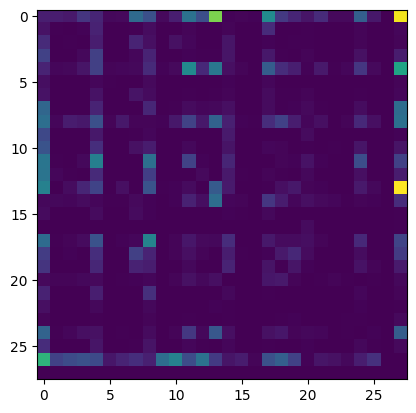

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(N)